# Stack Overflow 2023 Developer Survey

- Dataset: https://insights.stackoverflow.com/survey

In [29]:
# import libraries
import numpy as np
import pandas as pd

from zipfile import ZipFile
from joblib import load, dump

import warnings 
warnings.filterwarnings("ignore")

import shap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from catboost import Pool, CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# from feature_engine.encoding import RareLabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import ast

In [2]:
zip_file = ZipFile('data/stack-overflow-developer-survey-2023.zip')
df = pd.read_csv(zip_file.open('survey_results_public.csv'))
df = df.drop(['ResponseId'], axis=1).drop_duplicates()
print(df.shape)

(87981, 83)


In [ ]:
# df = pd.read_csv('data/survey_results_public.csv').drop(['ResponseId'], axis=1).drop_duplicates()
# print(df.shape)

In [3]:
df.head()

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87981 entries, 0 to 89183
Data columns (total 83 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Q120                                 87981 non-null  object 
 1   MainBranch                           87981 non-null  object 
 2   Age                                  87981 non-null  object 
 3   Employment                           87898 non-null  object 
 4   RemoteWork                           73810 non-null  object 
 5   CodingActivities                     73764 non-null  object 
 6   EdLevel                              87973 non-null  object 
 7   LearnCode                            87663 non-null  object 
 8   LearnCodeOnline                      70084 non-null  object 
 9   LearnCodeCoursesCert                 37076 non-null  object 
 10  YearsCode                            87435 non-null  object 
 11  YearsCodePro                     

In [5]:
df.columns

Index(['Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWantToWorkWith', 

## Data pre-processing

In [6]:
df[['CompTotal', 'ConvertedCompYearly']]

,CompTotal,ConvertedCompYearly
0,NaN,NaN
1,2.850000e+05,285000.0
2,2.500000e+05,250000.0
3,1.560000e+05,156000.0
4,1.320000e+06,23456.0
...,...,...
89179,2.000000e+05,NaN
89180,NaN,NaN
89181,NaN,NaN
89182,NaN,NaN


In [7]:
# target - ConvertedCompYearly
target = "ConvertedCompYearly"
# # select records with target label more than 1k USD/year
df = df[df[target]>1000]
print(df.shape)

(47327, 83)


In [8]:
df.head()

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
5,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other,...,1-2 times a week,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,Appropriate in length,Neither easy nor difficult,96828.0


In [9]:
# further exclude 2% of smallest and 2% of highest salaries
P = np.percentile(df[target], [2, 98])
df = df[(df[target] > P[0]) & (df[target] < P[1])]
print(df.shape)

(45430, 83)


In [10]:
print(P)
df.sample(5)

[  3898.52 310000.  ]


,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
88198,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Friend or family member;Online Courses or Cert...,Formal documentation provided by the owner of ...,Other,...,1-2 times a week,1-2 times a week,1-2 times a week,60-120 minutes a day,Less than 15 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Neither easy nor difficult,38282.0
24300,I agree,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Formal documentation provided by the owner of ...,NaN,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Neither easy nor difficult,275000.0
45696,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Udemy,...,1-2 times a week,3-5 times a week,1-2 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Observability to...,Financial Services,Appropriate in length,Easy,203000.0
32025,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Freelance/contract work,Some college/university study without earning ...,Hackathons (virtual or in-person);On the job t...,Formal documentation provided by the owner of ...,NaN,...,1-2 times a week,10+ times a week,1-2 times a week,30-60 minutes a day,60-120 minutes a day,DevOps function;Microservices;Automated testin...,Financial Services,Appropriate in length,Easy,77620.0
80595,I agree,I am a developer by profession,18-24 years old,"Employed, full-time",In-person,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Formal documentation provided by the owner of ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,33724.0


In [11]:
# convert YearsCode, YearsCodePro, and WorkExp to integers
def clean_years(x):
    if x == 'Less than 1 year':
        return 0
    elif x == 'More than 50 years':
        return 51
    else:
        return x
df['YearsCode'] = df['YearsCode'].apply(clean_years).fillna(-1).astype(int)
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_years).fillna(-1).astype(int)
df['WorkExp'] = df['WorkExp'].fillna(-1).astype(int)
# fill NaN values
df = df.fillna('none')

In [12]:
df.sample(5)

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
26162,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Hobby;Freelance/contract work,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Formal documentation provided by the owner of ...,none,...,Never,1-2 times a week,10+ times a week,Over 120 minutes a day,30-60 minutes a day,None of these,"Manufacturing, Transportation, or Supply Chain",Appropriate in length,Easy,14356.0
23368,I agree,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,none,Udemy,...,1-2 times a week,6-10 times a week,6-10 times a week,60-120 minutes a day,Over 120 minutes a day,DevOps function;Automated testing;Observabilit...,Other,Too long,Easy,85672.0
70384,I agree,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Contribute to open-source projects;Bootstrappi...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Other,...,Never,1-2 times a week,Never,Less than 15 minutes a day,30-60 minutes a day,Innersource initiative;Continuous integration ...,"Information Services, IT, Software Development...",Too long,Easy,12848.0
34323,I agree,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Associate degree (A.A., A.S., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Innersource initiative;Continuous integration ...,none,Appropriate in length,Neither easy nor difficult,59848.0
8492,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...,none,none,...,none,none,1-2 times a week,30-60 minutes a day,Less than 15 minutes a day,Automated testing;Developer portal or other ce...,Healthcare,Too short,Easy,100000.0


In [13]:
# drop unused columns
cols2drop = ['Q120', 'MainBranch', 'CodingActivities', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 
             'Knowledge_8', 'Frequency_1', 'Frequency_2', 'Frequency_3', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Currency', 'CompTotal', 'LanguageWantToWorkWith', 
            'DatabaseWantToWorkWith', 'PlatformWantToWorkWith', 'WebframeWantToWorkWith', 'MiscTechWantToWorkWith', 'ToolsTechWantToWorkWith', 
             'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncWantToWorkWith', 'AISearchWantToWorkWith', 
             'AIDevWantToWorkWith', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'SOAI', 'AISelect', 'AISent', 'AIAcc', 'AIBen', 
             'AIToolInterested in Using', 'AIToolCurrently Using', 'AIToolNot interested in Using', 'AINextVery different', 'AINextNeither different nor similar', 
             'AINextSomewhat similar', 'AINextVery similar', 'AINextSomewhat different', 'SurveyLength', 'SurveyEase', 'TimeSearching', 'TimeAnswering']
df = df.drop(cols2drop, axis=1)
print(df.shape)

(45430, 30)


In [14]:
df.sample(5)

,Age,Employment,RemoteWork,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,...,OfficeStackAsyncHaveWorkedWith,OfficeStackSyncHaveWorkedWith,AISearchHaveWorkedWith,AIDevHaveWorkedWith,TBranch,ICorPM,WorkExp,ProfessionalTech,Industry,ConvertedCompYearly
5357,35-44 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Codecademy,17,15,"Developer, full-stack",...,Azure Devops;Confluence;GitHub Discussions;Jir...,Microsoft Teams;Slack;Telegram;Zoom,none,none,Yes,Individual contributor,15,DevOps function;Innersource initiative;Continu...,none,48813.0
74038,18-24 years old,"Employed, full-time",In-person,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Formal documentation provided by the owner of ...,none,12,1,"Developer, full-stack",...,Markdown File,none,ChatGPT,none,Yes,Individual contributor,2,None of these,"Manufacturing, Transportation, or Supply Chain",70000.0
4793,45-54 years old,"Employed, full-time",Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,none,28,23,Developer Experience,...,GitHub Discussions;Markdown File,Discord;Matrix;Mattermost;Signal;Telegram;Zoom,none,none,Yes,Individual contributor,28,DevOps function;Automated testing;Continuous i...,"Information Services, IT, Software Development...",74963.0
12996,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",Online Courses or Certification,none,Udemy,4,3,"Developer, full-stack",...,Confluence;Jira;Trello,Google Meet;Microsoft Teams;Telegram;Zoom,ChatGPT,Tabnine,Yes,Individual contributor,4,Microservices;Observability tools;Innersource ...,"Information Services, IT, Software Development...",26237.0
14821,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Formal documentation provided by the owner of ...,none,4,2,"Developer, back-end",...,GitHub Discussions;Jira;Notion;Trello,Discord;Google Meet;Microsoft Teams;Slack;What...,none,none,Yes,Individual contributor,4,DevOps function;Observability tools;Continuous...,"Information Services, IT, Software Development...",38552.0


In [15]:
df.sample(5).T

,59781,83937,46163,22679,72982
Age,18-24 years old,35-44 years old,45-54 years old,25-34 years old,25-34 years old
Employment,"Employed, full-time","Employed, full-time","Employed, full-time","Employed, full-time","Employed, full-time"
RemoteWork,"Hybrid (some remote, some in-person)","Hybrid (some remote, some in-person)",In-person,In-person,"Hybrid (some remote, some in-person)"
EdLevel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Some college/university study without earning ...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
LearnCode,Books / Physical media;Online Courses or Certi...,Books / Physical media;Online Courses or Certi...,Books / Physical media;On the job training;Sch...,"Colleague;Other online resources (e.g., videos...","School (i.e., University, College, etc)"
LearnCodeOnline,Formal documentation provided by the owner of ...,Formal documentation provided by the owner of ...,none,Formal documentation provided by the owner of ...,none
LearnCodeCoursesCert,Codecademy;Coursera,Other;Udemy;Pluralsight,none,none,none
YearsCode,7,11,25,9,11
YearsCodePro,2,7,19,3,8
DevType,"Developer, front-end","Developer, full-stack",Scientist,System administrator,"Developer, back-end"


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45430 entries, 1 to 89171
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             45430 non-null  object 
 1   Employment                      45430 non-null  object 
 2   RemoteWork                      45430 non-null  object 
 3   EdLevel                         45430 non-null  object 
 4   LearnCode                       45430 non-null  object 
 5   LearnCodeOnline                 45430 non-null  object 
 6   LearnCodeCoursesCert            45430 non-null  object 
 7   YearsCode                       45430 non-null  int64  
 8   YearsCodePro                    45430 non-null  int64  
 9   DevType                         45430 non-null  object 
 10  OrgSize                         45430 non-null  object 
 11  Country                         45430 non-null  object 
 12  LanguageHaveWorkedWith          45430

In [17]:
df.iloc[:,1:].describe().T

,count,mean,std,min,25%,50%,75%,max
YearsCode,45430.0,15.742527,9.848623,-1.0,8.0,13.0,20.0,51.0
YearsCodePro,45430.0,10.765419,8.676874,-1.0,4.0,8.0,15.0,51.0
WorkExp,45430.0,7.503896,9.295945,-1.0,-1.0,5.0,12.0,50.0
ConvertedCompYearly,45430.0,89305.174444,59172.092736,3899.0,47119.0,75000.0,120000.0,309000.0


<Axes: >

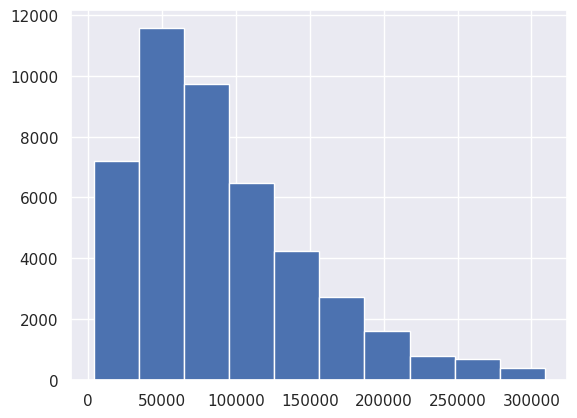

In [41]:
# distribution of target
df.ConvertedCompYearly.hist()

In [18]:
train_data = df[:35000]
val_data = df[35000:]

## Model

In [20]:
# Prep data for modeling

y = df[target].values.reshape(-1,)
X = df.drop([target], axis=1)
categorical = df.select_dtypes(include=['object']).columns
categorical_idx = [list(X.columns).index(c) for c in categorical]
numerical = ["YearsCode", "YearsCodePro", "WorkExp"]

In [21]:
y

array([285000., 250000., 156000., ...,  15752.,  64254.,  61041.])

In [22]:
X

,Age,Employment,RemoteWork,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,...,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackSyncHaveWorkedWith,AISearchHaveWorkedWith,AIDevHaveWorkedWith,TBranch,ICorPM,WorkExp,ProfessionalTech,Industry
1,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,Cisco Webex Teams;Discord;Google Chat;Google M...,ChatGPT,GitHub Copilot,Yes,People manager,10,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development..."
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,none,27,23,"Developer, back-end",...,MacOS;Other Linux-based,Markdown File;Stack Overflow for Teams,Microsoft Teams;Slack;Zoom,none,none,Yes,Individual contributor,23,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development..."
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,none,12,7,"Developer, front-end",...,iOS;iPadOS;MacOS,Jira,Discord;Google Meet;Microsoft Teams;Slack;Zoom,none,none,Yes,Individual contributor,7,Automated testing;Continuous integration (CI) ...,none
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,4,"Developer, full-stack",...,Other (Please Specify):,Confluence;Jira;Notion,Discord;Google Meet;Slack;Zoom,ChatGPT,none,Yes,Individual contributor,6,Microservices;Automated testing;Observability ...,Other
5,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other,21,21,"Developer, back-end",...,MacOS,Jira;Markdown File;Notion;Stack Overflow for T...,Google Meet;Microsoft Teams;Slack;Zoom,ChatGPT;Google Bard AI;Neeva AI,GitHub Copilot;Tabnine,Yes,Individual contributor,22,DevOps function;Microservices;Observability to...,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89162,35-44 years old,"Employed, full-time",Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Formal documentation provided by the owner of ...,none,30,24,"Developer, back-end",...,Windows,Doxygen;Jira;Markdown File,Google Chat;Google Meet;Skype;Zoom,none,none,Yes,People manager,25,Automated testing;Developer portal or other ce...,"Information Services, IT, Software Development..."
89166,18-24 years old,"Employed, full-time;Independent contractor, fr...",In-person,Some college/university study without earning ...,Books / Physical media;Hackathons (virtual or ...,Formal documentation provided by the owner of ...,Codecademy;Udemy,7,2,"Developer, full-stack",...,Red Hat;Windows,Confluence;Jira;Miro;Trello,Discord;Google Meet;Mattermost;Telegram,ChatGPT,none,Yes,Individual contributor,3,DevOps function;Microservices;Continuous integ...,Financial Services
89167,18-24 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,edX;Udemy;Coursera,6,2,"Developer, mobile",...,Android;MacOS,none,Google Meet;Slack,ChatGPT,none,Yes,Individual co

In [23]:
categorical

Index(['Age', 'Employment', 'RemoteWork', 'EdLevel', 'LearnCode',
       'LearnCodeOnline', 'LearnCodeCoursesCert', 'DevType', 'OrgSize',
       'Country', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
       'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
       'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith',
       'NEWCollabToolsHaveWorkedWith', 'OpSysProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackSyncHaveWorkedWith',
       'AISearchHaveWorkedWith', 'AIDevHaveWorkedWith', 'TBranch', 'ICorPM',
       'ProfessionalTech', 'Industry'],
      dtype='object')

In [24]:
categorical_idx

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 28]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31801, 29), (13629, 29), (31801,), (13629,))

In [26]:
# Model training parameters
model = CatBoostRegressor(iterations=1000,
                            depth=6,
                            verbose=0,
                            learning_rate=0.02,
                            l2_leaf_reg=15,
                            loss_function='RMSE',
                            random_seed=14)

# Train the model
model.fit(X_train, y_train, cat_features=categorical_idx, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [27]:
# make the prediction using the resulting model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"RMSE score for train {round(rmse_train,2)} USD/year, and for test {round(rmse_test,2)} USD/year")

RMSE score for train 32920.99 USD/year, and for test 34792.7 USD/year


In [28]:
# Baseline scores (assumption - same prediction for all data samples)
rmse_bs_train = mean_squared_error(y_train, [np.mean(y_train)]*len(y_train), squared=False)
rmse_bs_test = mean_squared_error(y_test, [np.mean(y_train)]*len(y_test), squared=False)
print(f"RMSE baseline score for train {round(rmse_bs_train,2)} USD/year, and for test {round(rmse_bs_test,2)} USD/year")

RMSE baseline score for train 59193.86 USD/year, and for test 59119.09 USD/year


### Explanations with SHAP

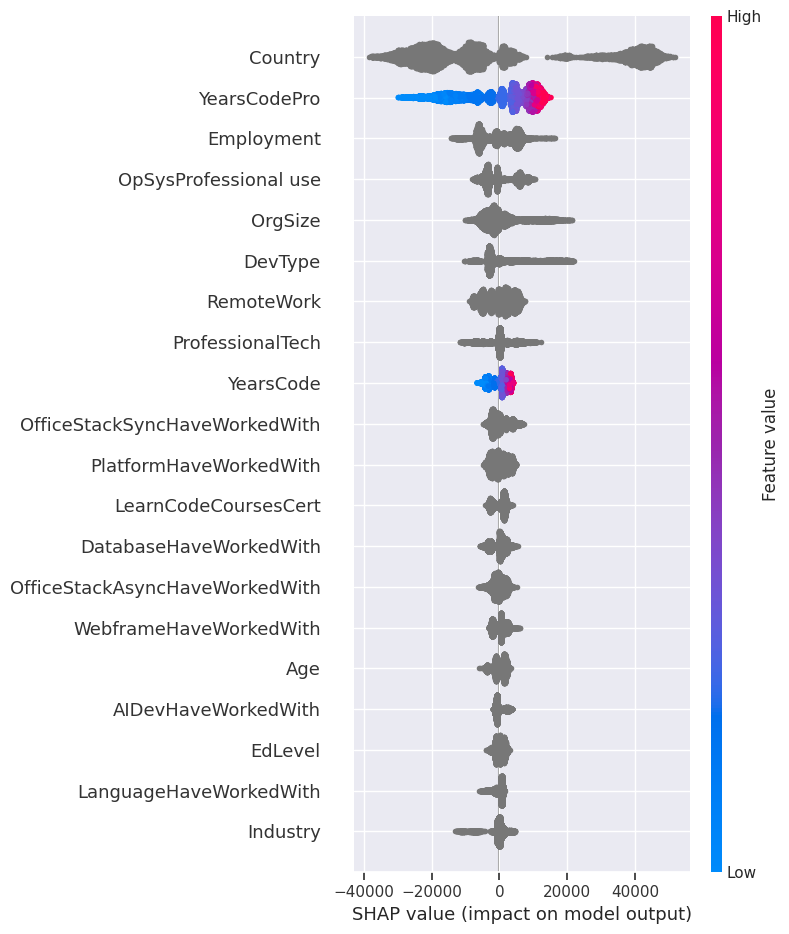

In [30]:
shap.initjs()
ex = shap.TreeExplainer(model)
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [31]:
expected_values = ex.expected_value
print(f"Average predicted salary is {round(expected_values,1)} USD/year")
print(f"Average actual salary is {round(np.mean(y_test),1)} USD/year")

Average predicted salary is 89294.8 USD/year
Average actual salary is 89308.6 USD/year


In [33]:
# save model
model.save_model(fname='model/sf_catboost_model',
           format="cbm",
           export_parameters=None,
           pool=None)


### Dump model and reference data

In [35]:
with open('model/sf_catboost.bin', 'wb') as f_out:
    dump(model, f_out)

In [ ]:
val_data.to_csv('data/sf_reference.csv')

### Load and use saved model

In [36]:
# load model
model_l = CatBoostRegressor()
model_loaded = model_l.load_model(fname='model/sf_catboost_model')

In [37]:
# predict using loaded model
y_train_pred = model_loaded.predict(X_train)
y_test_pred = model_loaded.predict(X_test)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"RMSE score for train {round(rmse_train,2)} USD/year, and for test {round(rmse_test,2)} USD/year")

RMSE score for train 32920.99 USD/year, and for test 34792.7 USD/year


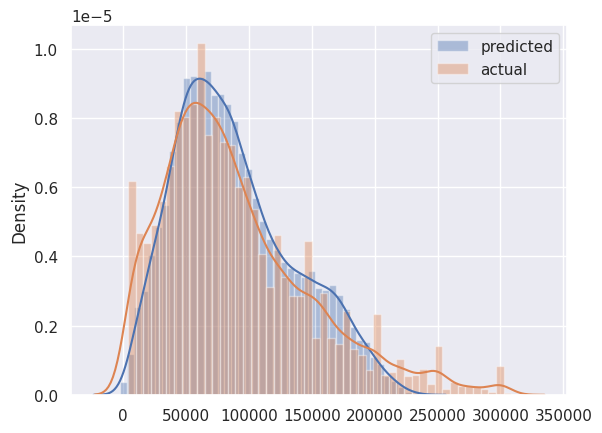

In [38]:
# visualize
sns.distplot(y_test_pred, label='predicted')
sns.distplot(y_test, label='actual')
plt.legend()